<a href="https://colab.research.google.com/github/stanislawmadej/ML/blob/main/Siec%CC%81_neuronowa_Stanis%C5%82aw_Madej.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Celem naszej pracy jest przygotowanie sieci neuronowej. Głównym założeniem sieci będzie szacowanie - na podstawie cech znajdujących się w zbiorze danych - czy klient skorzysta z oferty banku, czy nie.

Skonstruowany przez nas model na podstawie odpowiedzi z ankiet będzie wyznaczał prawdopodobieństwo skorzystania z oferty banku przez ankietowanych. Do projektu wykorzystaliśmy dane wraz z ich opisem z Bank Marketing Data Set. Zbiór danych wraz z opisem można znaleźć tutaj: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [ ]:
#Zaczynamy od zaimportowania biblioteki pandas i wczytania oryginalnego pliku z danymi z separatorem - ";"
import pandas as pd

#ten zbiór danych nie zawiera nagłówków, dlatego przy wczytywaniu pliku dodajemy separator ";"
dane = pd.read_csv('/bank-full.csv', delimiter=';') 

# podczas wczytywania naszej sieci, mieliśmy problem z poprawnym wczytaniem wszystkich rekordów dlatego zdecydowaliśmy się na wypłeninienie rekordów z NULL zerami
dane.dropna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10338,37,housemaid,married,secondary,no,187,no,no,unknown,12.0,jun,165.0,1.0,-1.0,0.0,unknown,no
10339,57,entrepreneur,married,unknown,no,657,no,no,unknown,12.0,jun,344.0,1.0,-1.0,0.0,unknown,no
10340,58,retired,married,primary,no,657,yes,no,unknown,12.0,jun,128.0,2.0,-1.0,0.0,unknown,no
10341,36,blue-collar,married,primary,no,398,yes,no,unknown,12.0,jun,278.0,1.0,-1.0,0.0,unknown,no


In [ ]:
#teraz wyświetlamy sobie 5 pierwszych pozycji
#możemy zauważyć jakie dane podane są w rekordach - są to dane demograficzne i takie bezpośrednio związane z branżą klienta (banku)
dane.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [ ]:
#wyświetlamy informacje o naszych danych
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10344 entries, 0 to 10343
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10344 non-null  int64  
 1   job        10344 non-null  object 
 2   marital    10344 non-null  object 
 3   education  10344 non-null  object 
 4   default    10344 non-null  object 
 5   balance    10344 non-null  int64  
 6   housing    10344 non-null  object 
 7   loan       10343 non-null  object 
 8   contact    10343 non-null  object 
 9   day        10343 non-null  float64
 10  month      10343 non-null  object 
 11  duration   10343 non-null  float64
 12  campaign   10343 non-null  float64
 13  pdays      10343 non-null  float64
 14  previous   10343 non-null  float64
 15  poutcome   10343 non-null  object 
 16  y          10343 non-null  object 
dtypes: float64(5), int64(2), object(10)
memory usage: 1.3+ MB


Co o tych danych wiemy? Tego typu dane wymagają przekształcenia, więc importujemy potrzebną do tego bibliotekę

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoded_job = label_encoder.fit_transform(dane['contact'])
encoded_job

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
# konwerujemy typ danych na numeryczny dla:
label_encoder = LabelEncoder()
#job
dane['job'] = label_encoder.fit_transform(dane['job'])
#marital
dane['marital'] = label_encoder.fit_transform(dane['marital'])
#education
dane['education'] = label_encoder.fit_transform(dane['education'])
#default
dane['default'] = label_encoder.fit_transform(dane['default'])
#housing
dane['housing'] = label_encoder.fit_transform(dane['housing'])
#loan
dane['loan'] = label_encoder.fit_transform(dane['loan'])
#contact
dane['contact'] = label_encoder.fit_transform(dane['contact'])
#month
dane['month'] = label_encoder.fit_transform(dane['month'])
#poutcome
dane['poutcome'] = label_encoder.fit_transform(dane['poutcome'])
#y
dane['y'] = label_encoder.fit_transform(dane['y'])


In [ ]:
#wyświetlamy teraz przykładowe przekształcone dane
dane.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,0,5.0,1,261.0,1.0,-1.0,0.0,0,0
1,44,9,2,1,0,29,1,0,0,5.0,1,151.0,1.0,-1.0,0.0,0,0
2,33,2,1,1,0,2,1,1,0,5.0,1,76.0,1.0,-1.0,0.0,0,0
3,47,1,1,3,0,1506,1,0,0,5.0,1,92.0,1.0,-1.0,0.0,0,0
4,33,11,2,3,0,1,0,0,0,5.0,1,198.0,1.0,-1.0,0.0,0,0


In [ ]:
#następnie wyświetlamy informacje o tych danych
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10344 entries, 0 to 10343
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10344 non-null  int64  
 1   job        10344 non-null  int64  
 2   marital    10344 non-null  int64  
 3   education  10344 non-null  int64  
 4   default    10344 non-null  int64  
 5   balance    10344 non-null  int64  
 6   housing    10344 non-null  int64  
 7   loan       10344 non-null  int64  
 8   contact    10344 non-null  int64  
 9   day        10343 non-null  float64
 10  month      10344 non-null  int64  
 11  duration   10343 non-null  float64
 12  campaign   10343 non-null  float64
 13  pdays      10343 non-null  float64
 14  previous   10343 non-null  float64
 15  poutcome   10344 non-null  int64  
 16  y          10344 non-null  int64  
dtypes: float64(5), int64(12)
memory usage: 1.3 MB


In [ ]:
#zapisujemy plik z przekształconymi danymi
dane.to_csv('bank-full-opracowane.csv', encoding='utf-8', header=False, index=False)

In [ ]:
#przechodzimy do tworzenia naszej sieci neuronowej przy użyciu Keras i Tensorflow. Do tego wczytujemy sobie potrzebne biblioteki
from numpy import loadtext
from keras.models import Sequential
from keras.layers import Dense

ImportError: ignored

In [ ]:
p_dane = pd.read_csv('bank-full-opracowane.csv', header=None)
#wyświetlamy kilka rekordów
p_dane.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,58,4,1,2,0,2143,1,0,0,5.0,1,261.0,1.0,-1.0,0.0,0,0
1,44,9,2,1,0,29,1,0,0,5.0,1,151.0,1.0,-1.0,0.0,0,0
2,33,2,1,1,0,2,1,1,0,5.0,1,76.0,1.0,-1.0,0.0,0,0
3,47,1,1,3,0,1506,1,0,0,5.0,1,92.0,1.0,-1.0,0.0,0,0
4,33,11,2,3,0,1,0,0,0,5.0,1,198.0,1.0,-1.0,0.0,0,0


In [ ]:
#wyświetlamy informacje o danych
p_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10344 entries, 0 to 10343
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10344 non-null  int64  
 1   1       10344 non-null  int64  
 2   2       10344 non-null  int64  
 3   3       10344 non-null  int64  
 4   4       10344 non-null  int64  
 5   5       10344 non-null  int64  
 6   6       10344 non-null  int64  
 7   7       10344 non-null  int64  
 8   8       10344 non-null  int64  
 9   9       10343 non-null  float64
 10  10      10344 non-null  int64  
 11  11      10343 non-null  float64
 12  12      10343 non-null  float64
 13  13      10343 non-null  float64
 14  14      10343 non-null  float64
 15  15      10344 non-null  int64  
 16  16      10344 non-null  int64  
dtypes: float64(5), int64(12)
memory usage: 1.3 MB


In [ ]:
#następnie załadowujemy te dane
#wcześniej mielismy problem z wczytaniem tego pliku, więc ograniczyliśmy liczbę wczytanych danych do 10343 rekordów
dataset = loadtxt('bank-full-opracowane.csv', delimiter=',', max_rows=10343)

In [ ]:
#definiujemy teraz dane wejściowe do naszej sieci:
X = dataset[:,0:16]
Y = dataset[:,16]

In [ ]:
#nazywamy nasze kolumny
col_names = ['age', 'job', 'martial', 'education', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign']

In [ ]:
# definiujemy the keras model
model = Sequential()
model.add(Dense(12, input_dim=16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# teraz skompilujmy nasz model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# wrzucamy do modelu nasze cechy wejściowe (16 cech) i informujemy nasz model,czy wynik dla tych cech wejściowych jest równy 1 czy 0. Nasza sieć ma dane i etykiety - dzięki temu uczy się. Od razu definiujemy też liczbę iteracji - epochs, a następnie całość przypisujemy do zmiennej history, która później będzie nam potrzebna przy sprawdzeniu skuteczności naszej sieci
history = model.fit(X, Y, epochs=150, batch_size=10, verbose=2)

Epoch 1/150
1035/1035 - 2s - loss: 0.7158 - accuracy: 0.9488 - 2s/epoch - 2ms/step
Epoch 2/150
1035/1035 - 1s - loss: 0.4145 - accuracy: 0.9514 - 1s/epoch - 1ms/step
Epoch 3/150
1035/1035 - 1s - loss: 0.3533 - accuracy: 0.9551 - 1s/epoch - 1ms/step
Epoch 4/150
1035/1035 - 1s - loss: 0.5402 - accuracy: 0.9542 - 1s/epoch - 1ms/step
Epoch 5/150
1035/1035 - 1s - loss: 0.2862 - accuracy: 0.9554 - 1s/epoch - 1ms/step
Epoch 6/150
1035/1035 - 1s - loss: 0.3235 - accuracy: 0.9559 - 1s/epoch - 1ms/step
Epoch 7/150
1035/1035 - 1s - loss: 0.2564 - accuracy: 0.9558 - 1s/epoch - 1ms/step
Epoch 8/150
1035/1035 - 1s - loss: 0.1886 - accuracy: 0.9598 - 1s/epoch - 1ms/step
Epoch 9/150
1035/1035 - 1s - loss: 0.1794 - accuracy: 0.9589 - 1s/epoch - 1ms/step
Epoch 10/150
1035/1035 - 1s - loss: 0.1598 - accuracy: 0.9590 - 1s/epoch - 1ms/step
Epoch 11/150
1035/1035 - 1s - loss: 0.1536 - accuracy: 0.9613 - 1s/epoch - 1ms/step
Epoch 12/150
1035/1035 - 1s - loss: 0.1176 - accuracy: 0.9621 - 1s/epoch - 1ms/step
E

In [ ]:
# teraz mamy już wyciwiczony model, więc prosimy naszą sieć o przewidywania
predictions = (model.predict(X) > 0.5).astype("int32")

In [ ]:
# wypisujemy wyniki dla kilku obserwacji
# skorzystamy tu z pętli for - chcemy otrzymać przewidywania dla 20 obserwacji stąd w funkcji in range wpisaliśmy 20
for i in range(20):
	print('cechy wejściowe obserwacji (input): %s => przewidziany wynik (output): %d (rzeczywista wartość: %d)' % (X[i].tolist(), predictions[i], Y[i]))

cechy wejściowe obserwacji (input): [58.0, 4.0, 1.0, 2.0, 0.0, 2143.0, 1.0, 0.0, 0.0, 5.0, 1.0, 261.0, 1.0, -1.0, 0.0, 0.0] => przewidziany wynik (output): 0 (rzeczywista wartość: 0)
cechy wejściowe obserwacji (input): [44.0, 9.0, 2.0, 1.0, 0.0, 29.0, 1.0, 0.0, 0.0, 5.0, 1.0, 151.0, 1.0, -1.0, 0.0, 0.0] => przewidziany wynik (output): 0 (rzeczywista wartość: 0)
cechy wejściowe obserwacji (input): [33.0, 2.0, 1.0, 1.0, 0.0, 2.0, 1.0, 1.0, 0.0, 5.0, 1.0, 76.0, 1.0, -1.0, 0.0, 0.0] => przewidziany wynik (output): 0 (rzeczywista wartość: 0)
cechy wejściowe obserwacji (input): [47.0, 1.0, 1.0, 3.0, 0.0, 1506.0, 1.0, 0.0, 0.0, 5.0, 1.0, 92.0, 1.0, -1.0, 0.0, 0.0] => przewidziany wynik (output): 0 (rzeczywista wartość: 0)
cechy wejściowe obserwacji (input): [33.0, 11.0, 2.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 5.0, 1.0, 198.0, 1.0, -1.0, 0.0, 0.0] => przewidziany wynik (output): 0 (rzeczywista wartość: 0)
cechy wejściowe obserwacji (input): [35.0, 4.0, 1.0, 2.0, 0.0, 231.0, 1.0, 0.0, 0.0, 5.0, 1.0,

In [ ]:
#Za pomocą .history możemy pozyskać wzkaźnik skuteczności naszej sieci dla kolejnych powtórzeń. Chcemy także uzystać zbiorcze wyniki o naszej sieci, więc odwołujemy się do wskaźnika 'accuracy'.
history.history['accuracy']

[0.9487575888633728,
 0.9513680934906006,
 0.9551387429237366,
 0.954171895980835,
 0.9554287791252136,
 0.9559122323989868,
 0.9558155536651611,
 0.9597795605659485,
 0.9589093923568726,
 0.9590060710906982,
 0.9613264799118042,
 0.9620999693870544,
 0.9593928456306458,
 0.9624866843223572,
 0.9617132544517517,
 0.9615198969841003,
 0.9624866843223572,
 0.9634535312652588,
 0.9644203782081604,
 0.9645170569419861,
 0.9632601737976074,
 0.9631634950637817,
 0.9651938676834106,
 0.9634535312652588,
 0.963066816329956,
 0.9637435674667358,
 0.9634535312652588,
 0.963936984539032,
 0.9646137356758118,
 0.9645170569419861,
 0.9631634950637817,
 0.9656772613525391,
 0.965387225151062,
 0.9644203782081604,
 0.9645170569419861,
 0.9646137356758118,
 0.9647104144096375,
 0.9635502099990845,
 0.9647104144096375,
 0.9648070931434631,
 0.9629701375961304,
 0.9647104144096375,
 0.9631634950637817,
 0.9647104144096375,
 0.9648070931434631,
 0.9631634950637817,
 0.9652905464172363,
 0.96374356746673

In [ ]:
# możemy je również wyświetlić na wykresie
# w tym celu importujemy potrzebne nam wykresy z biblioteki matplotlib
from matplotlib import pyplot

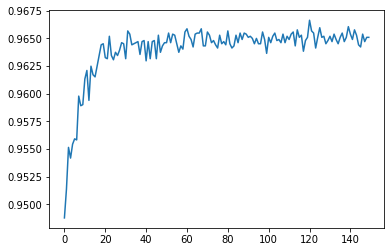

In [ ]:
# teraz rysujemy wykres - odwołujemy się w nim do naszej zmiennej history oraz do wartości 'accuracy'
# korzystamy również z .history, bo chcemy zobaczyć jak zmieniała się skuteczność naszej sieci w wyniku kolejnych powtórzeń
pyplot.plot(history.history['accuracy']) 
pyplot.show()

In [ ]:
#Korzystajmy jeszcze z metody .evaluate aby otrzymać informację o skuteczności całego naszego modelu. Dzięki metodzie .evaluate dostaliśmy dwie liczby, które opisują nasz model: pierwsza z nich to strata(loss), druga natomiast przedstawia skuteczność naszego modelu.
model.evaluate(X,Y)

324/324 [==============================] - 1s 1ms/step - loss: 0.0766 - accuracy: 0.9659


[0.07655373215675354, 0.9658706188201904]